## World Happiness Report

Context:
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


Content:
The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [1]:
#importing all the required librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
report = pd.read_csv(r"E:\datatrained\World_Happiness_report.csv")
report.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Exracting columns for further analysis of data

columns_name = ['Country','Region','Happiness Rank','Happiness Score','Standard Error',
                'Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom' ,'Trust (Government Corruption)',
                'Generosity','Dystopia Residual']
happy_report = report[columns_name].copy()
happy_report = report.rename(columns={'Ladder score':'Happiness score','Regional indicator':'Region'})
happy_report.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happy_report.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
happy_report.isnull().sum() # Check for null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:ylabel='Country'>

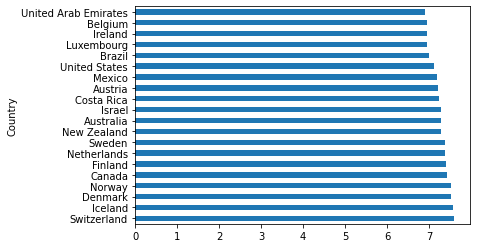

In [7]:
report.groupby('Country')['Happiness Score'].sum().sort_values(ascending=False)[0:20].plot(kind='barh')

Text(0, 0.5, '')

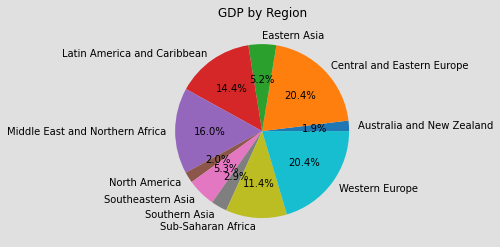

In [8]:
# GDP by Region

plt.rcParams['figure.facecolor']='#E0E0E0'
Region_GDP = happy_report.groupby('Region')['Economy (GDP per Capita)'].sum() 
Region_GDP.plot.pie(autopct='%1.1f%%')
plt.title("GDP by Region")
plt.ylabel('')

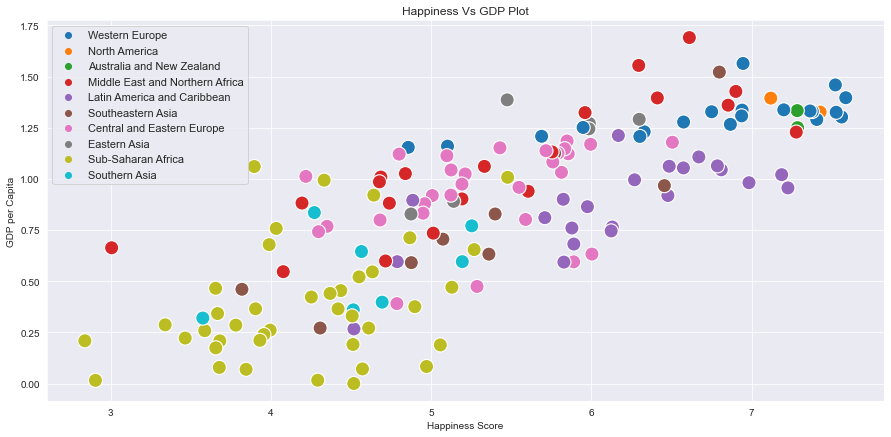

In [9]:
# Happiness Vs GDP plot

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,7)
plt.title("Happiness Vs GDP Plot")
sns.scatterplot(x = happy_report['Happiness Score'], y= happy_report['Economy (GDP per Capita)'], hue=happy_report['Region'], s =200)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.legend(loc='upper left', fontsize=11)

In [10]:
# Number of Countries in each Region
countries_region = happy_report.groupby('Region')[['Country']].count()
countries_region

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


<AxesSubplot:>

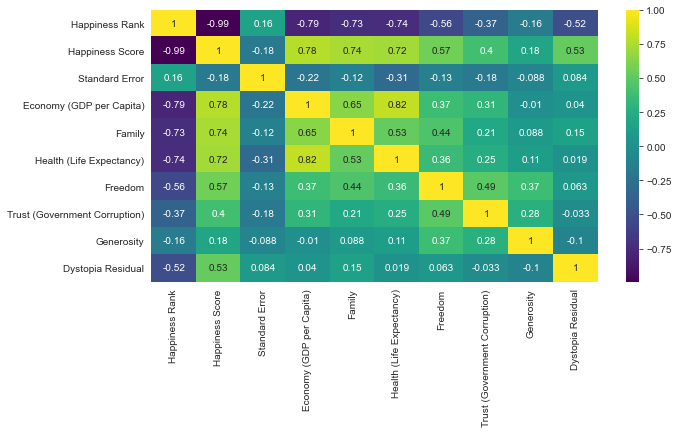

In [11]:
# Correlation Map

cor = happy_report.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='viridis',ax=ax)

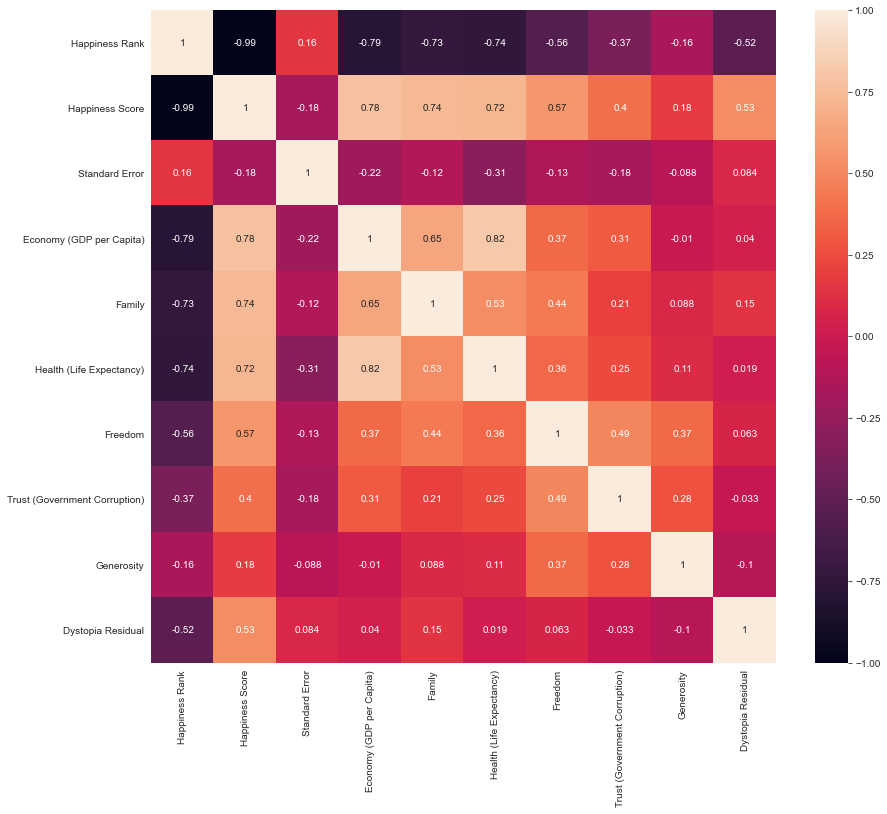

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(happy_report.corr(), annot = True, vmin = -1.0, vmax = 1.0)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

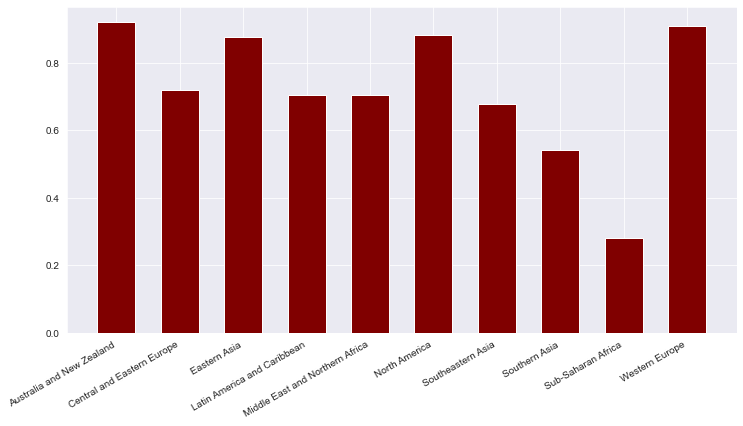

In [13]:
# Average Life Expectancy per Region

corruption = happy_report.groupby('Region')[['Health (Life Expectancy)']].mean()
plt.rcParams['figure.figsize'] = (12,6)
plt.bar(corruption.index, corruption['Health (Life Expectancy)'],color='maroon',width = 0.6)
plt.xticks(rotation=30,ha='right')

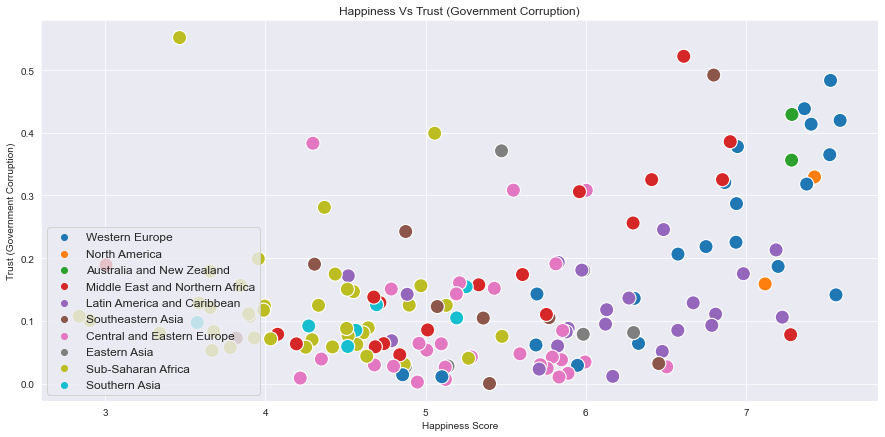

In [14]:
# Happiness Score Vs Corruption


plt.rcParams['figure.figsize'] = (15,7)
plt.title("Happiness Vs Trust (Government Corruption)")
sns.scatterplot(x = happy_report['Happiness Score'], y= happy_report['Trust (Government Corruption)'], hue=happy_report['Region'], s =200)
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.legend(loc='lower left', fontsize=12)

Text(0.5, 1.0, 'Bottom 10 least happy countries Life Expectancy')

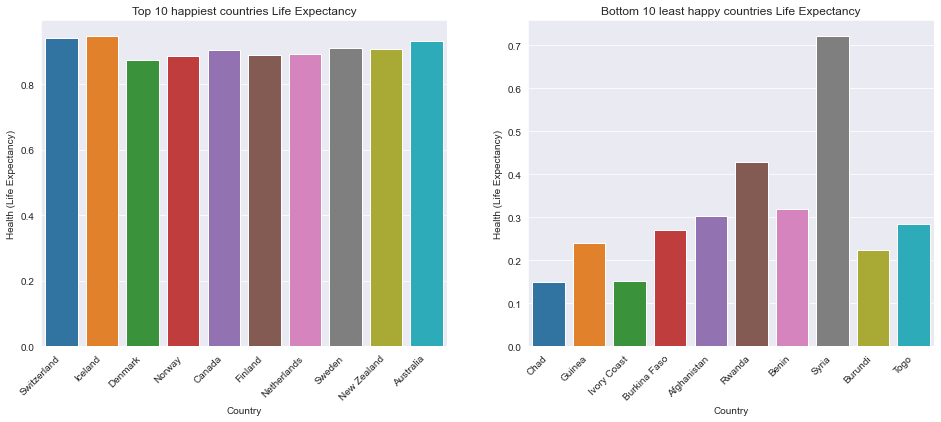

In [15]:
# Top 10 and bottom 10 happiest countries

top_10 = happy_report.head(10)
bottom_10 = happy_report.tail(10)

fig, axes = plt.subplots(1,2,figsize=(16,6))
sns.barplot(x=top_10['Country'], y=top_10['Health (Life Expectancy)'],ax=axes[0])
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Health (Life Expectancy)")
axes[0].set_xticklabels(top_10['Country'],rotation =45, ha='right')
axes[0].set_title("Top 10 happiest countries Life Expectancy")


sns.barplot(x=bottom_10['Country'], y=bottom_10['Health (Life Expectancy)'],ax=axes[1])
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Health (Life Expectancy)")
axes[1].set_xticklabels(bottom_10['Country'],rotation =45, ha='right')
axes[1].set_title("Bottom 10 least happy countries Life Expectancy")

In [16]:
#Let's check relationship between features and labels

x = report.drop(columns=['Happiness Score','Happiness Rank'])
y = report['Happiness Score']

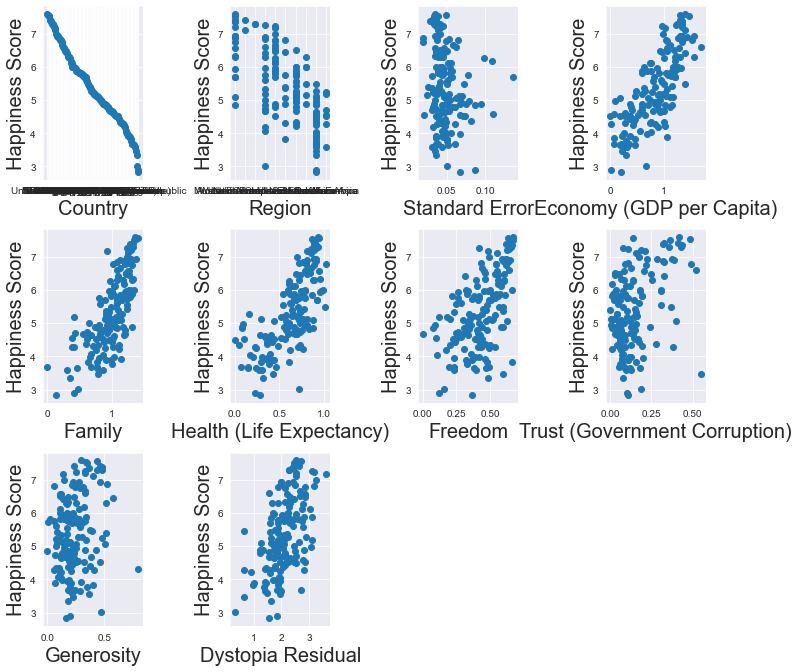

In [17]:
plt.figure(figsize=(10,12))

plotnumber=1

for column in x:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Happiness Score', fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [18]:
#Filtering with use logical_and method
report[np.logical_and(report['Freedom']>0.65, report['Family']>1.34)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741


In [22]:
#List comprehension usage
average = sum(report.Family)/len(report.Family)
report["Family_Situtation"] = ["Above Average" if i>average else "Average" if i==average else "Below Average" for i in report.Family]
report.columns #We'll see Family_Situtation is in our columns right now!
report.head()

,Happiness Rank,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Family_Situtation
0,1,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0,1,Above Average
1,2,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0,1,Above Average
2,3,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0,1,Above Average
3,4,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0,1,Above Average
4,5,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,1,0,0,0,0,Above Average


In [23]:
#Use a filter for see the Below Average countries
filtered_data = report.Family_Situtation =="Below Average"
report[filtered_data]

,Happiness Rank,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Family_Situtation
13,14,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214,0,0,0,1,0,0,0,0,0,0,Below Average
39,40,0.97200,0.60820,0.59657,0.13633,0.16991,2.79094,0,0,0,1,0,0,0,0,0,0,Below Average
46,47,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978,0,0,1,0,0,0,0,0,0,0,Below Average
50,51,0.97841,0.53920,0.57414,0.08800,0.20536,2.82334,0,0,0,1,0,0,0,0,0,0,Below Average
57,58,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450,0,0,0,1,0,0,0,0,0,0,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,0,1,0,Below Average
154,155,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,0,1,0,Below Average
155,156,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,0,1,0,0,0,0,0,Below Average
156,157,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,0,1,0,Below Average


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
report = report.iloc[:,[1,2,6,7,8,9,10,11]]
report = pd.get_dummies(report)

X, y = report.iloc[:,1:16], report.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


lr.coef_: [-5.79398385e+01 -7.39647726e+01 -3.97142238e+01 -4.71676477e+01
 -2.27082852e+01 -3.83520514e+01  4.74969808e+00  1.08957862e+00
 -4.11015607e+00  2.43627736e+00 -5.49812199e+00 -1.51853636e+00
  3.65613283e-02  4.13645485e+00  5.96909660e+00]
lr.intercept_: 291.16222219432547


In [20]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.97


In [21]:
# Data splitting
# X,y split
x = report.iloc[:, 1:].values
y = report.iloc[:, 0].values

# Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions x_train dataset:  (126, 16)
Number transactions y_train dataset:  (126,)
Number transactions x_test dataset:  (32, 16)
Number transactions y_test dataset:  (32,)


### Conclusions

In conclusion, our happiness score for world happiness can be used using the model above. By using sklearn, we have build a preliminary machine learning tool that will help us generate country scores, and the higher the score, the more highly ranked the happiness of that country will be. Of course, there is always tools and analysis you can do further to this model in order to make it more accurate, and better to use. It would be beneficial to further explore a comparison between the three years in our report, and also look at comparisons between subcontinents. Although, we have a pretty good start in order to further investigate this data.